<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/OUTLIERS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# SUBIMOS PROVISIONALMENTE EL ARCHIVO A GOOGLE COLAB. 
# El archivo esta aquí C:\Users\FJMartin\OneDrive - JARMAUTO\Documentos\2018\POWER BI INFORMES\DATOS MAESTROS\MACHINE LEARNING
# y es el que esta debajo CONSULTA1_AGR_F_APERTURA  es el u382 agrupado por fecha de apertura


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

- esto abriendo una consulta dentro de un excel.
- lo he subido a colab y luego lo he abierto. Tarda un poco en subir.
- tengo que poner el nombre de la pestaña. 
- ojo tarda un poco en subir el archivo a colab. un archivo de 34mb ha tardado 1 minuto y 30 segundos. 

In [5]:
xlsx = pd.ExcelFile("/content/drive/MyDrive/Colab Notebooks/U382_BASE2.xlsx")
df = pd.read_excel(xlsx, "CONSULTA1_AGR_F_APERTURA" )
# he descargado el archivo en google drive para no tener que estar cargarlo cada vez que lo utilice. 

In [ ]:
""" xlsx = pd.ExcelFile("/content/U382_BASE2.xlsx")
df = pd.read_excel(xlsx, "CONSULTA1_AGR_F_APERTURA" ) """

In [6]:
df.head()

,Orden_Corta,Recuento,F_APERTURA,SUMA_RECAMBIOS,SUMA_MO,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM
0,775439,1,2015-01-02,0.00,19.83,0.28,0.758904,27584.0
1,774412,1,2015-01-02,119.78,62.04,1.20,2.512329,61030.0
2,774401,1,2015-01-02,136.80,161.70,2.10,3.306849,60358.0
3,774715,2,2015-01-02,236.36,317.02,4.20,5.512329,56404.0
4,775595,1,2015-01-02,0.00,0.00,0.00,5.183562,92762.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145695 entries, 0 to 145694
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Orden_Corta            145695 non-null  int64         
 1   Recuento               145695 non-null  int64         
 2   F_APERTURA             145695 non-null  datetime64[ns]
 3   SUMA_RECAMBIOS         145695 non-null  float64       
 4   SUMA_MO                145694 non-null  float64       
 5   SUMA_HORAS_FACTURADAS  145695 non-null  float64       
 6   AÑOS_VEHICULO          145695 non-null  float64       
 7   KM                     145694 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 8.9 MB


In [8]:
df.describe()

,Orden_Corta,Recuento,SUMA_RECAMBIOS,SUMA_MO,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM
count,1.456950e+05,145695.000000,145695.000000,145694.000000,145695.000000,145695.000000,145694.000000
mean,1.070782e+06,1.453564,334.529579,242.391004,4.443828,5.785898,91140.843240
std,1.727761e+05,0.850063,702.359577,371.963158,7.411066,4.488056,75343.883965
min,3.532300e+05,1.000000,-16621.630000,-16621.630000,-313.620000,0.000000,-20000.000000
25%,9.238030e+05,1.000000,42.120000,60.200000,1.000000,2.167123,32572.750000
50%,1.063734e+06,1.000000,167.760000,139.565000,2.200000,4.410959,70526.000000
75%,1.220650e+06,2.000000,383.900000,279.560000,4.650000,8.369863,127239.000000
max,1.377125e+06,16.000000,27892.830000,33243.260000,763.860000,29.953425,964478.000000


In [9]:
df.isnull().sum()

Orden_Corta              0
Recuento                 0
F_APERTURA               0
SUMA_RECAMBIOS           0
SUMA_MO                  1
SUMA_HORAS_FACTURADAS    0
AÑOS_VEHICULO            0
KM                       1
dtype: int64

#HACEMOS EL CLUSTER

In [10]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

In [11]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [12]:
# Suppress Warning

import warnings
warnings.filterwarnings("ignore")

In [13]:
df.head()

,Orden_Corta,Recuento,F_APERTURA,SUMA_RECAMBIOS,SUMA_MO,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM
0,775439,1,2015-01-02,0.00,19.83,0.28,0.758904,27584.0
1,774412,1,2015-01-02,119.78,62.04,1.20,2.512329,61030.0
2,774401,1,2015-01-02,136.80,161.70,2.10,3.306849,60358.0
3,774715,2,2015-01-02,236.36,317.02,4.20,5.512329,56404.0
4,775595,1,2015-01-02,0.00,0.00,0.00,5.183562,92762.0


In [14]:
df.info() # tengo que cambiar formatos. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145695 entries, 0 to 145694
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Orden_Corta            145695 non-null  int64         
 1   Recuento               145695 non-null  int64         
 2   F_APERTURA             145695 non-null  datetime64[ns]
 3   SUMA_RECAMBIOS         145695 non-null  float64       
 4   SUMA_MO                145694 non-null  float64       
 5   SUMA_HORAS_FACTURADAS  145695 non-null  float64       
 6   AÑOS_VEHICULO          145695 non-null  float64       
 7   KM                     145694 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 8.9 MB


In [15]:
df["Orden_Corta"] = df["Orden_Corta"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145695 entries, 0 to 145694
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Orden_Corta            145695 non-null  object        
 1   Recuento               145695 non-null  int64         
 2   F_APERTURA             145695 non-null  datetime64[ns]
 3   SUMA_RECAMBIOS         145695 non-null  float64       
 4   SUMA_MO                145694 non-null  float64       
 5   SUMA_HORAS_FACTURADAS  145695 non-null  float64       
 6   AÑOS_VEHICULO          145695 non-null  float64       
 7   KM                     145694 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 8.9+ MB


In [16]:
df.shape # tenemos 145695 pasos de taller y 8 variables

(145695, 8)

In [17]:
df.describe()

,Recuento,SUMA_RECAMBIOS,SUMA_MO,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM
count,145695.000000,145695.000000,145694.000000,145695.000000,145695.000000,145694.000000
mean,1.453564,334.529579,242.391004,4.443828,5.785898,91140.843240
std,0.850063,702.359577,371.963158,7.411066,4.488056,75343.883965
min,1.000000,-16621.630000,-16621.630000,-313.620000,0.000000,-20000.000000
25%,1.000000,42.120000,60.200000,1.000000,2.167123,32572.750000
50%,1.000000,167.760000,139.565000,2.200000,4.410959,70526.000000
75%,2.000000,383.900000,279.560000,4.650000,8.369863,127239.000000
max,16.000000,27892.830000,33243.260000,763.860000,29.953425,964478.000000


- La media de Recambios por paso es 334 y la mediana 167.76
- la media de Mo por paso es de 242.39 y la mediana 139.56
- la media de horas por paso es de 4.43 y la mediana 2.20
- la media de la edad de los vehículo es de 5.75 y la mediana 4.41
- la media de KM es de 91.140 y la mediana 70.526

In [ ]:
df.isnull().sum()

Orden_Corta              0
Recuento                 0
F_APERTURA               0
SUMA_RECAMBIOS           0
SUMA_MO                  1
SUMA_HORAS_FACTURADAS    0
AÑOS_VEHICULO            0
KM                       1
dtype: int64

In [ ]:
df = df.dropna(subset=["KM"]) # CON ESTO LO QUE HAGO ES QUITAR LA FILA QUE TIENE EN KM VALOR NULO. 

In [ ]:
df.shape

(145694, 8)

In [ ]:
df.isnull().sum()

Orden_Corta              0
Recuento                 0
F_APERTURA               0
SUMA_RECAMBIOS           0
SUMA_MO                  0
SUMA_HORAS_FACTURADAS    0
AÑOS_VEHICULO            0
KM                       0
dtype: int64

## CHEQUEANDO OUTLIERS

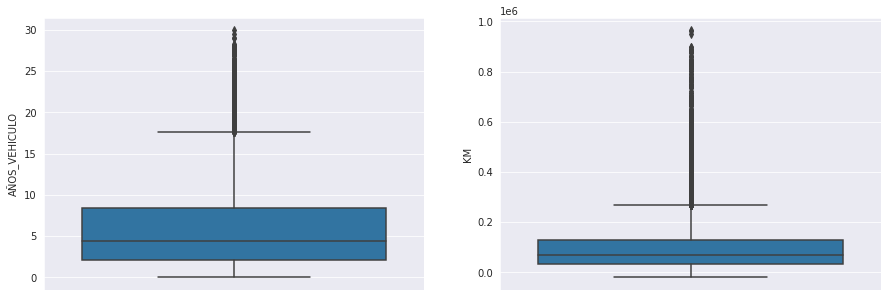

In [ ]:
plt.figure(figsize=(15,5)) # aqui poenmos el tamaño de cada cuadradro. 

plt.subplot(1,2,1)
sns.boxplot(data=df, y="AÑOS_VEHICULO") # este va a ocupar el primer lugar de la segunda fila. 

plt.subplot(1,2,2)
sns.boxplot(data=df, y="KM") # este va a ocupar el segundo lugar de la primera fila. 

plt.show()
# lo que estamos viendo es un diagrama de bigotes donde apreciamos que no hay outliers.

# lo voy a hacer con outliers, mas adelante lo veré quitandolos. 

#EDA

## ANALISIS POR VARIABLE

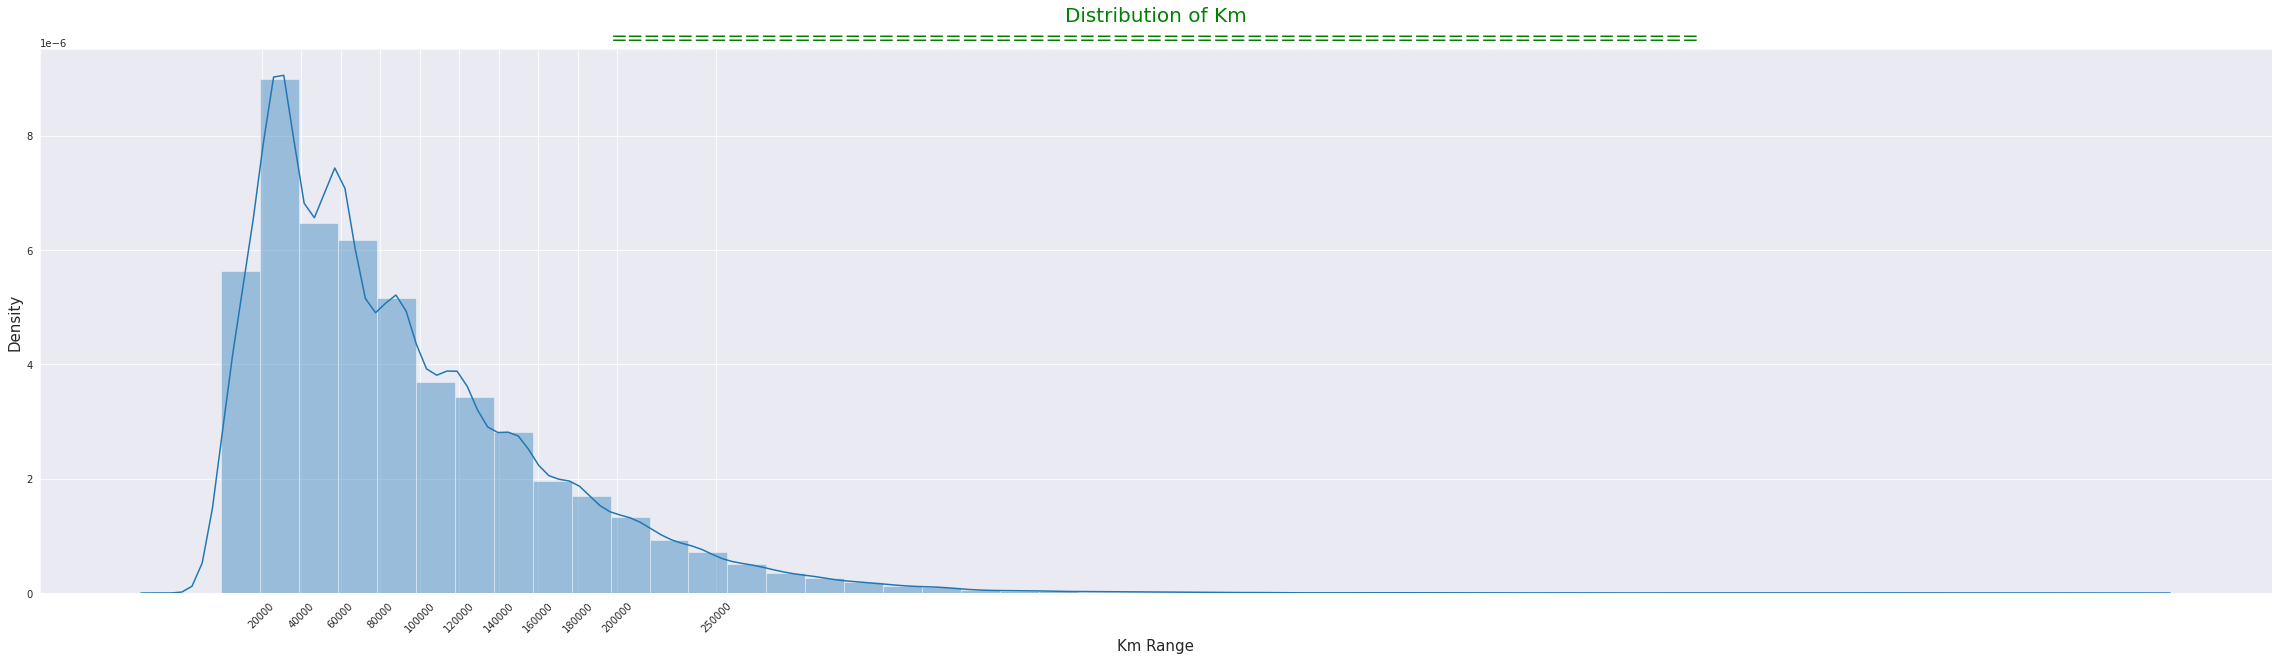

In [ ]:
# Checking KM

plt.figure(figsize=(40,10)) # tamaño del gráfico
sns.set_style('darkgrid') # color del mismo

sns.distplot(df.KM) # valor que vamos a representar
plt.title("Distribution of Km\n=================================================================", fontsize=20, color="green") # titulo
plt.xticks([20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,250000]) # OJO IMPORTANTE CON ESTO CAMBIO LAS ESCALAS DE X
plt.xticks(rotation=45) # y así las roto 45 grados. 
plt.xlabel("Km Range", fontsize=15, ) # distancia entre barras
plt.ylabel("Density", fontsize=15) # distancias en el eje x

plt.show()

# veo que se concentra la gran parte entre 60, 80 y 100.000 km luego está bastante disperso. 

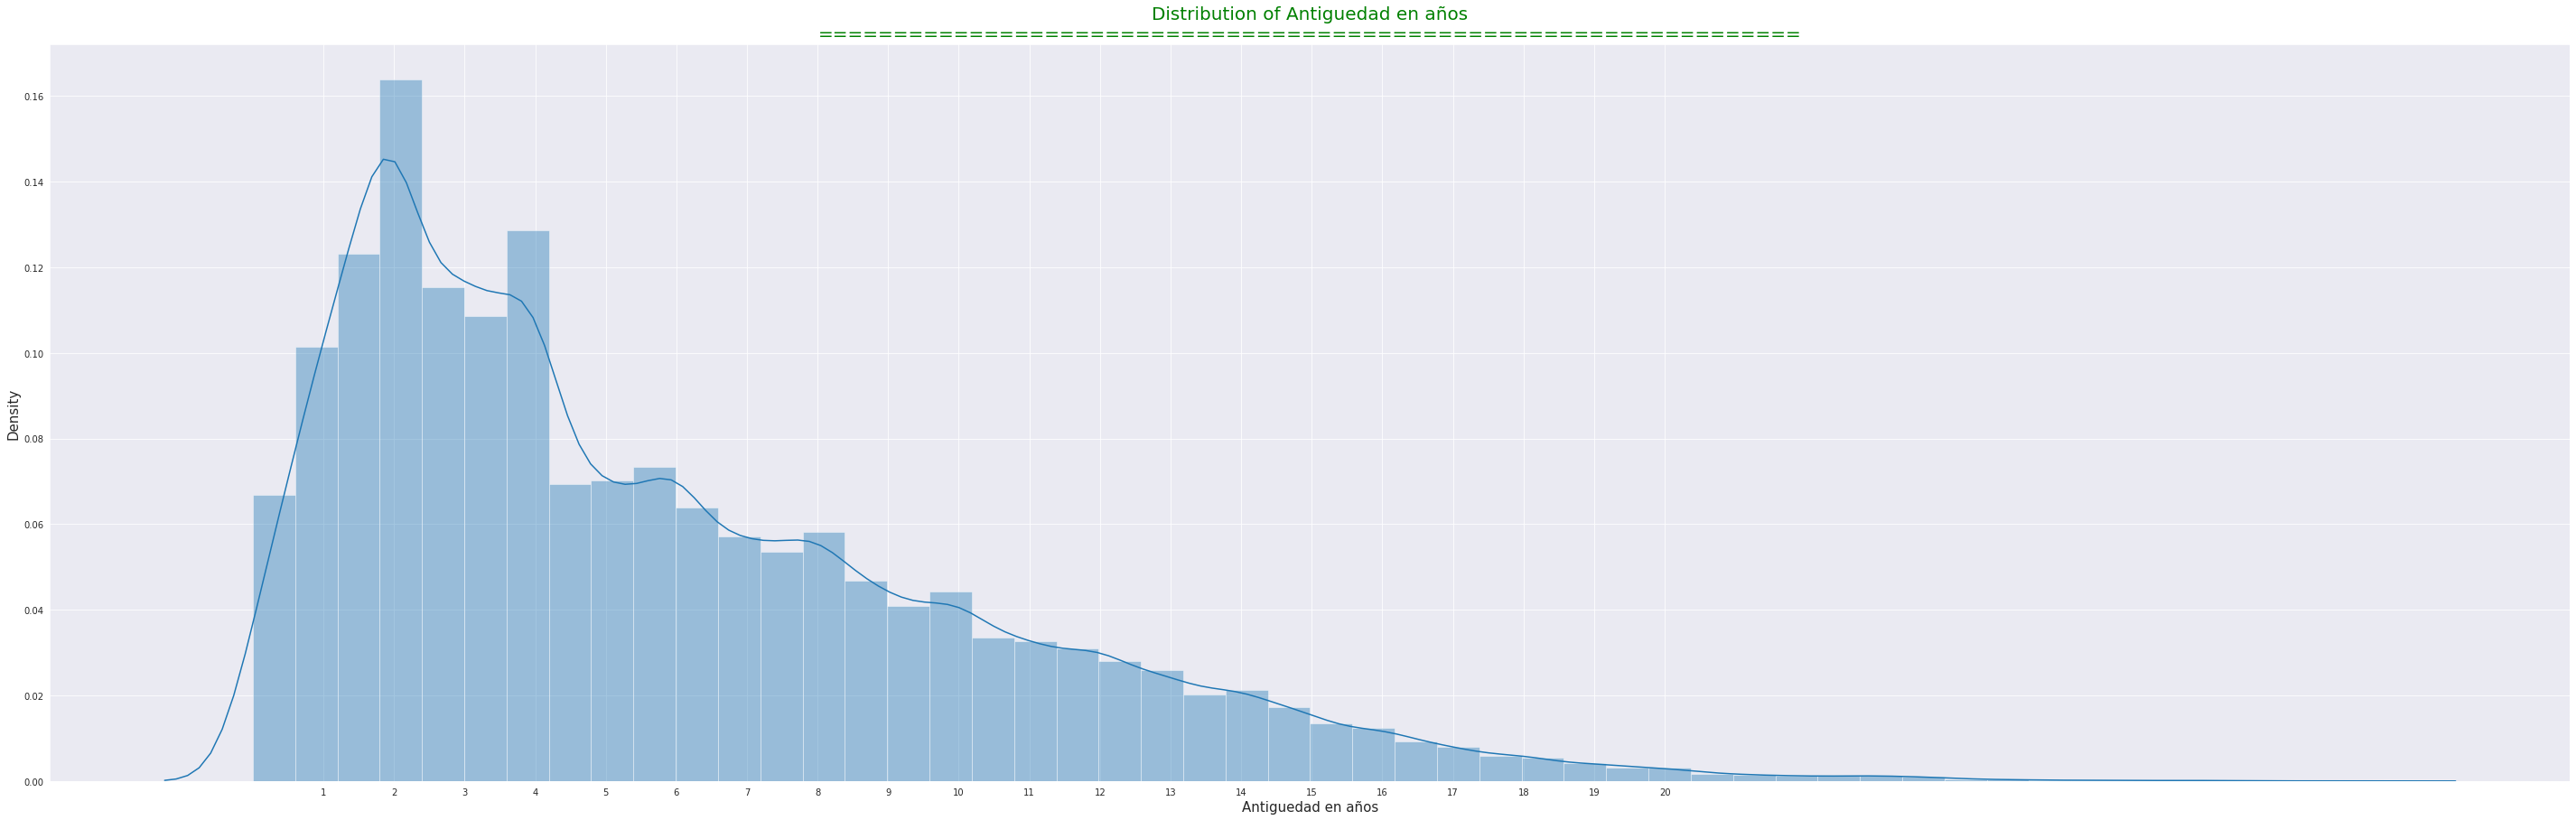

In [ ]:
# Checking edad del vehículo

plt.figure(figsize=(50,15)) # tamaño del gráfico
sns.set_style('darkgrid') # color del mismo

sns.distplot(df.AÑOS_VEHICULO) # valor que vamos a representar
plt.title("Distribution of Antiguedad en años\n=================================================================", fontsize=20, color="green") # titulo
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]) # OJO IMPORTANTE CON ESTO CAMBIO LAS ESCALAS DE X
plt.xlabel("Antiguedad en años", fontsize=15) # distancia entre barras
plt.ylabel("Density", fontsize=15) # distancias en el eje x

plt.show()

# hay clientes de diferentes edades, no podemos decir que este concentrado en unas cuantas. 

## vamos a hacer un graficos con dos variables. 

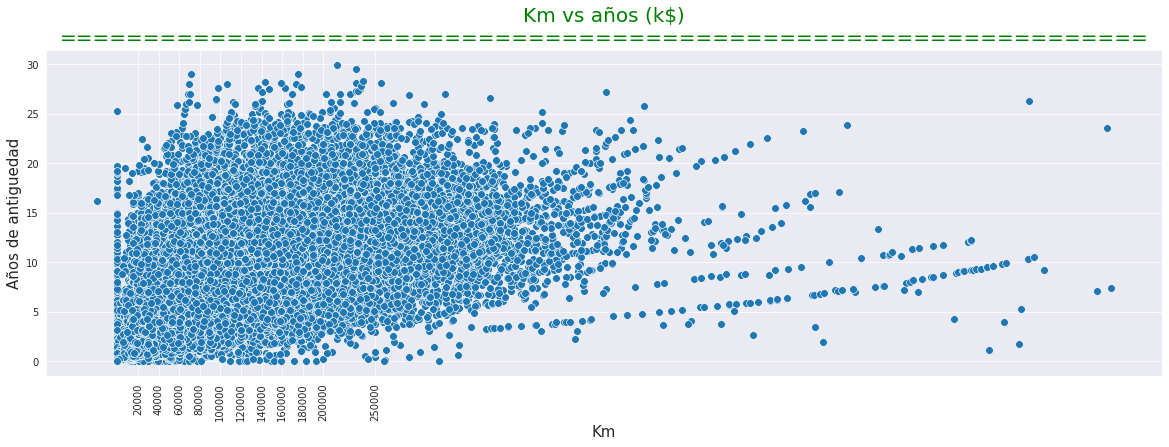

In [ ]:
# Años vs Km

plt.figure(figsize=(20,6)) # tamaño del grafico
sns.set_style('darkgrid') # estilo del grafico

sns.scatterplot(data=df, x="KM", y= "AÑOS_VEHICULO", s=60) # tipo del gráfico
# le decimos el dataframe a tomar en cuenta y sus variables así como el color y el tamañao
plt.title("Km vs años (k$)\n=================================================================", fontsize=20, color="green")
plt.xticks([20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,250000]) # OJO IMPORTANTE CON ESTO CAMBIO LAS ESCALAS DE X
plt.xticks(rotation=90) # y así las roto 45 grados. 
plt.xlabel("Km", fontsize=15)
plt.ylabel("Años de antiguedad", fontsize=15)
plt.show()

## le llamamos binning, que es hacer intervalos con los datos que tenemos

In [ ]:
# aqui lo que estamos haciendo es hacer grupos por edad. 
# Age - 

Age_0_2 = df.AÑOS_VEHICULO[(df.AÑOS_VEHICULO>=0) & (df.AÑOS_VEHICULO<=2)] 
Age_3_4 = df.AÑOS_VEHICULO[(df.AÑOS_VEHICULO>=3) & (df.AÑOS_VEHICULO<=4)] 
Age_5_6 = df.AÑOS_VEHICULO[(df.AÑOS_VEHICULO>=5) & (df.AÑOS_VEHICULO<=6)] 
Age_7_8 = df.AÑOS_VEHICULO[(df.AÑOS_VEHICULO>=7) & (df.AÑOS_VEHICULO<=8)] 
Age_9_10 = df.AÑOS_VEHICULO[(df.AÑOS_VEHICULO>=9) & (df.AÑOS_VEHICULO<=10)] 
Age_11_12 = df.AÑOS_VEHICULO[(df.AÑOS_VEHICULO>=11) & (df.AÑOS_VEHICULO<=12)] 
 
Age_12_Above = df.AÑOS_VEHICULO[(df.AÑOS_VEHICULO>=13)]

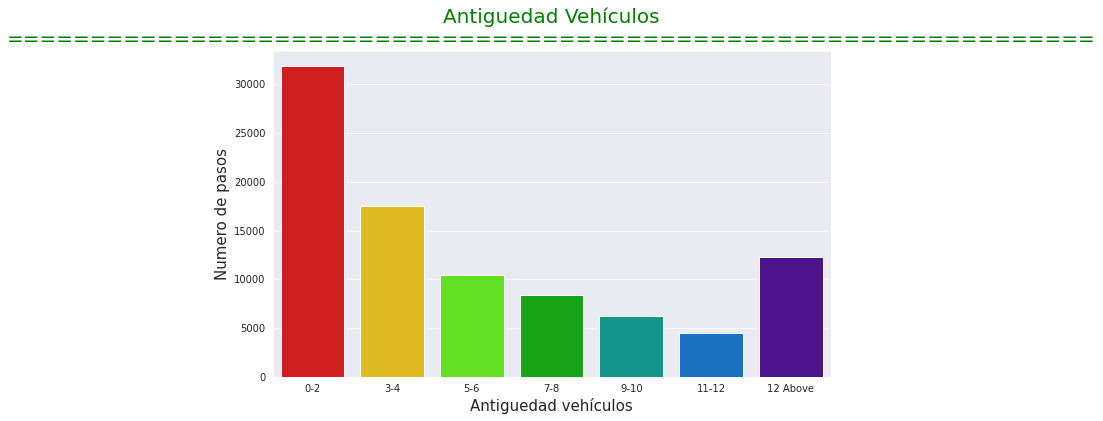

In [ ]:
x = ["0-2","3-4","5-6","7-8","9-10","11-12", "12 Above"]
y = [len(Age_0_2.values),len(Age_3_4.values),len(Age_5_6.values),len(Age_7_8.values),len(Age_9_10.values), len(Age_11_12.values), len(Age_12_Above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="nipy_spectral_r")
plt.title("Antiguedad Vehículos\n=================================================================", fontsize=20, color="green")
plt.xlabel("Antiguedad vehículos", fontsize=15)
plt.ylabel("Numero de pasos", fontsize=15)
plt.show()

In [ ]:
# aqui lo que estamos haciendo es hacer grupos por Km
# Age - 

Km_0_30 = df.KM[(df.KM>=0) & (df.KM<=30000)]         
Km_31_60= df.KM[(df.KM>=31000) & (df.KM<=60000)] 
Km_61_90 = df.KM[(df.KM>=61000) & (df.KM<=90000)] 
Km_91_120 = df.KM[(df.KM>=91000) & (df.KM<=120000)]
Km_121_150 = df.KM[(df.KM>=121000) & (df.KM<=150000)]
Km_151_180 = df.KM[(df.KM>=151000) & (df.KM<=180000)]
Km_181_210 = df.KM[(df.KM>=181000) & (df.KM<=210000)]
Km_211_240 = df.KM[(df.KM>=211000) & (df.KM<=240000)]
  
Km_241_Above = df.KM[(df.KM>=241000)]

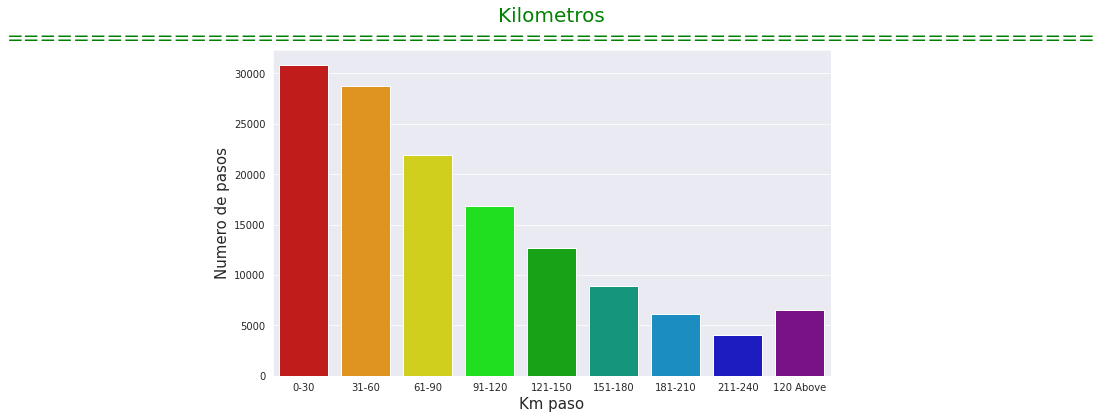

In [ ]:
x = ["0-30","31-60","61-90","91-120","121-150","151-180","181-210", "211-240", "120 Above"]
y = [len(Km_0_30.values),len(Km_31_60.values),len(Km_61_90.values),len(Km_91_120.values),len(Km_121_150.values), len(Km_151_180.values),
     len(Km_181_210.values), len(Km_211_240), len(Km_241_Above)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="nipy_spectral_r")
plt.title("Kilometros\n=================================================================", fontsize=20, color="green")
plt.xlabel("Km paso", fontsize=15)
plt.ylabel("Numero de pasos", fontsize=15)
plt.show()

## Ahora vamos a reescalar. 

In [ ]:
df_scaled = df[["SUMA_HORAS_FACTURADAS","AÑOS_VEHICULO","KM"]] # aqui estamos creando un nuevo dataframe para estandarizar
# le estamos metiendo las variables edad, ingresos anuales y gasto

# Class instance
scaler = StandardScaler()  # esta es la instancia de escalado

# Fit_transform
df_scaled_fit = scaler.fit_transform(df_scaled)  # aqui ajustamos 

In [ ]:
df_scaled_fit = pd.DataFrame(df_scaled_fit) # renombramos el dataframe una vez scalado y lo convertimos en un dataframe
df_scaled_fit.columns = ["SUMA_HORAS_FACTURADAS","AÑOS_VEHICULO","KM"] # le ponemos el nombre a las columnas 
df_scaled_fit.head()

,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM
0,-0.561891,-1.120098,-0.843560
1,-0.437730,-0.729409,-0.399647
2,-0.316268,-0.552378,-0.408566
3,-0.032857,-0.060964,-0.461046
4,-0.599679,-0.134218,0.021517


In [ ]:
var_list = df_scaled_fit[["AÑOS_VEHICULO","KM"]] # nos quedamos con dos variables. 
var_list

,AÑOS_VEHICULO,KM
0,-1.120098,-0.843560
1,-0.729409,-0.399647
2,-0.552378,-0.408566
3,-0.060964,-0.461046
4,-0.134218,0.021517
...,...,...
145689,0.457309,1.098104
145690,0.085544,-0.339297
145691,-0.431508,-0.303049
145692,2.277066,0.165205


In [ ]:
# Calculating sum of squared distance
# calculando el cuadrado de las distancias. 
ssd = [] # creamos lista vacía. 

for num_clusters in range(1,11): # generamos el bucle. 
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50) # le metemos la variables para el kmeans
    kmeans.fit(var_list) # los ajustamos al dataframe var_list que jemso creado arriba. 
    
    ssd.append(kmeans.inertia_) # kmeans-inertia el el valor de la distancia cuadratica. 

In [ ]:
ssd # estas son las distancias cuadráticas de los puntos. 

[291387.9999999965,
 117747.23677500719,
 80780.23779886839,
 63468.96135615425,
 51754.13787583073,
 44363.31223242411,
 38473.05544563839,
 34342.599792347064,
 30760.7645359046,
 27905.6144542233]

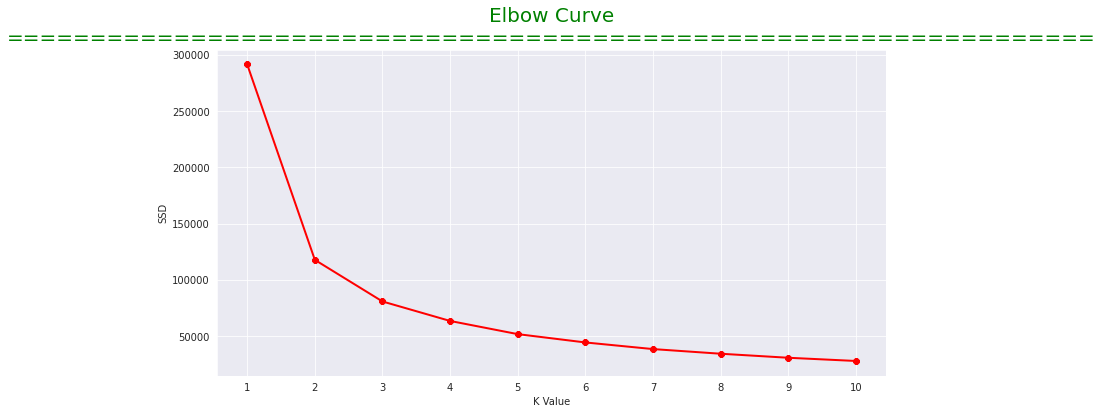

In [ ]:
plt.figure(figsize=(12,6)) # tamaño del gráfico 

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
# en el grafico metemos el range, la lista ssd, ancho  de la linea, color y el tamaño del punto
plt.title("Elbow Curve\n=================================================================", fontsize=20, color="green")
plt.xlabel("K Value")  
plt.xticks(np.arange(1,11,1))  # estos son los valores que queremos que aparezcan en el eje x
plt.ylabel("SSD")

plt.show()

# como podemos ver debajo el codo pierde la pendiente en k igual a 4

In [ ]:
# K=4

kmeans = KMeans(n_clusters=4, max_iter=50)  # aqui ya ponemos que el numero de clusters es 5
kmeans.fit(var_list) # lo ajustamos al dataframe. 

KMeans(max_iter=50, n_clusters=4)

In [ ]:
kmeans.labels_  # aqui ya tenemos a que kluster pertencen

array([0, 0, 0, ..., 0, 2, 0], dtype=int32)

In [ ]:
df["Label"] = kmeans.labels_
# aui estamos creando una variable donde metemos todos los clusters.
# estamos metiendolo en el dataframe df. 

In [ ]:
df.head()

,Orden_Corta,Recuento,F_APERTURA,SUMA_RECAMBIOS,SUMA_MO,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM,Label
0,775439,1,2015-01-02,0.00,19.83,0.28,0.758904,27584.0,0
1,774412,1,2015-01-02,119.78,62.04,1.20,2.512329,61030.0,0
2,774401,1,2015-01-02,136.80,161.70,2.10,3.306849,60358.0,0
3,774715,2,2015-01-02,236.36,317.02,4.20,5.512329,56404.0,3
4,775595,1,2015-01-02,0.00,0.00,0.00,5.183562,92762.0,3


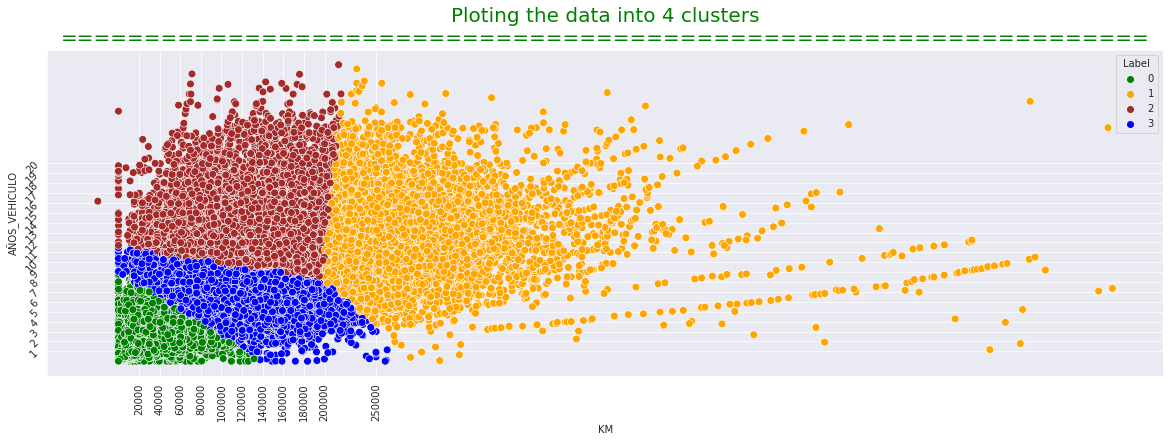

In [ ]:
# ScatterPlot when K=4

# ahora vamos a graficar el cluster segun ingresos y gastos. 

plt.figure(figsize=(20,6))

plt.title("Ploting the data into 4 clusters\n=================================================================", fontsize=20, color="green")
plt.xticks([20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,250000]) # OJO IMPORTANTE CON ESTO CAMBIO LAS ESCALAS DE X
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]) # OJO IMPORTANTE CON ESTO CAMBIO LAS ESCALAS DE X
plt.yticks(rotation=45) # y así las roto 45 grados. 
plt.xticks(rotation=90) # y así las roto 45 grados. 
sns.scatterplot(data=df, x="KM", y="AÑOS_VEHICULO", hue="Label", s=60, palette=['green','orange','brown','blue'])
# metemos el dataframe df, la x va a ser annual income y la y spending score, el color será el cluster . y le ponemos color a cada cluster. 

plt.show()

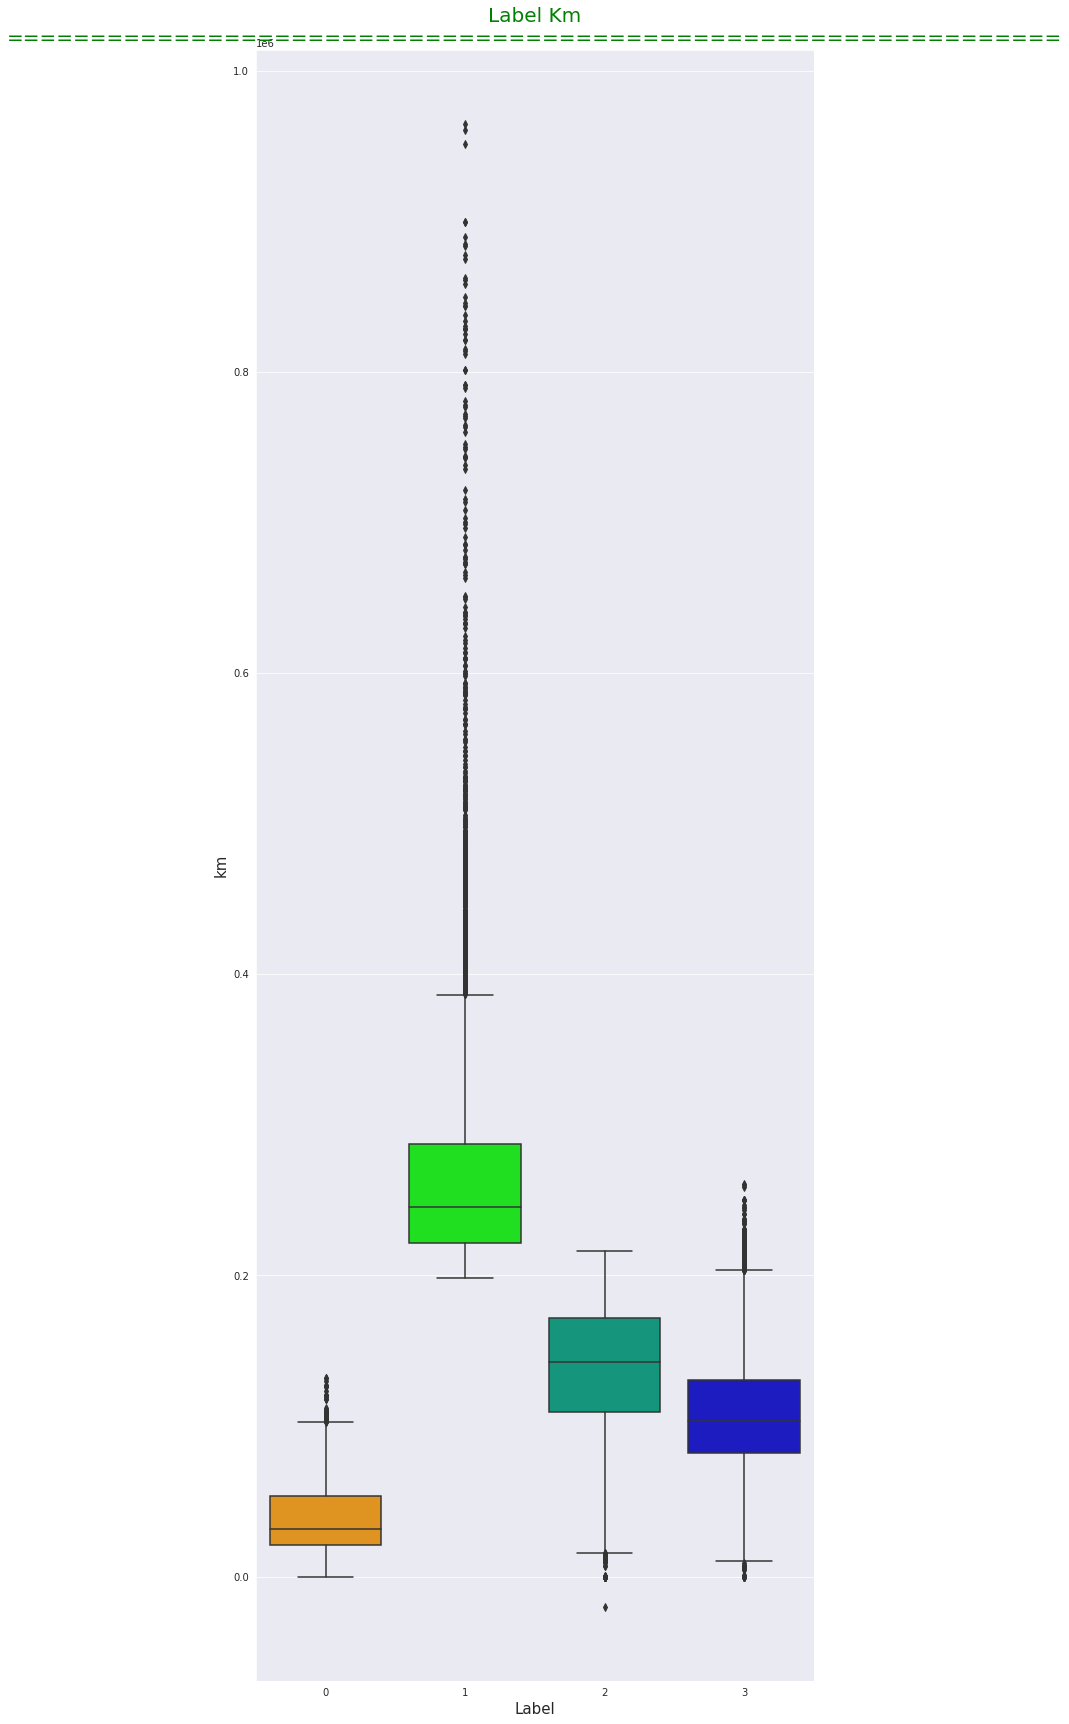

In [ ]:
# plot

# ahora lo que vemos de cada cluster son sus estadisticos. 

plt.figure(figsize=(10,30)) # tamaño del gráfico
sns.boxplot(x='Label', y='KM', data=df, palette="nipy_spectral_r") # las variables que voy a meter en el gráfico, además del dataframe que voy a utilizar. 
plt.title("Label Km\n===============================================================", fontsize=20, color="green")
plt.xlabel(xlabel="Label", fontsize=15)
plt.ylabel(ylabel="km",fontsize=15)
plt.show()

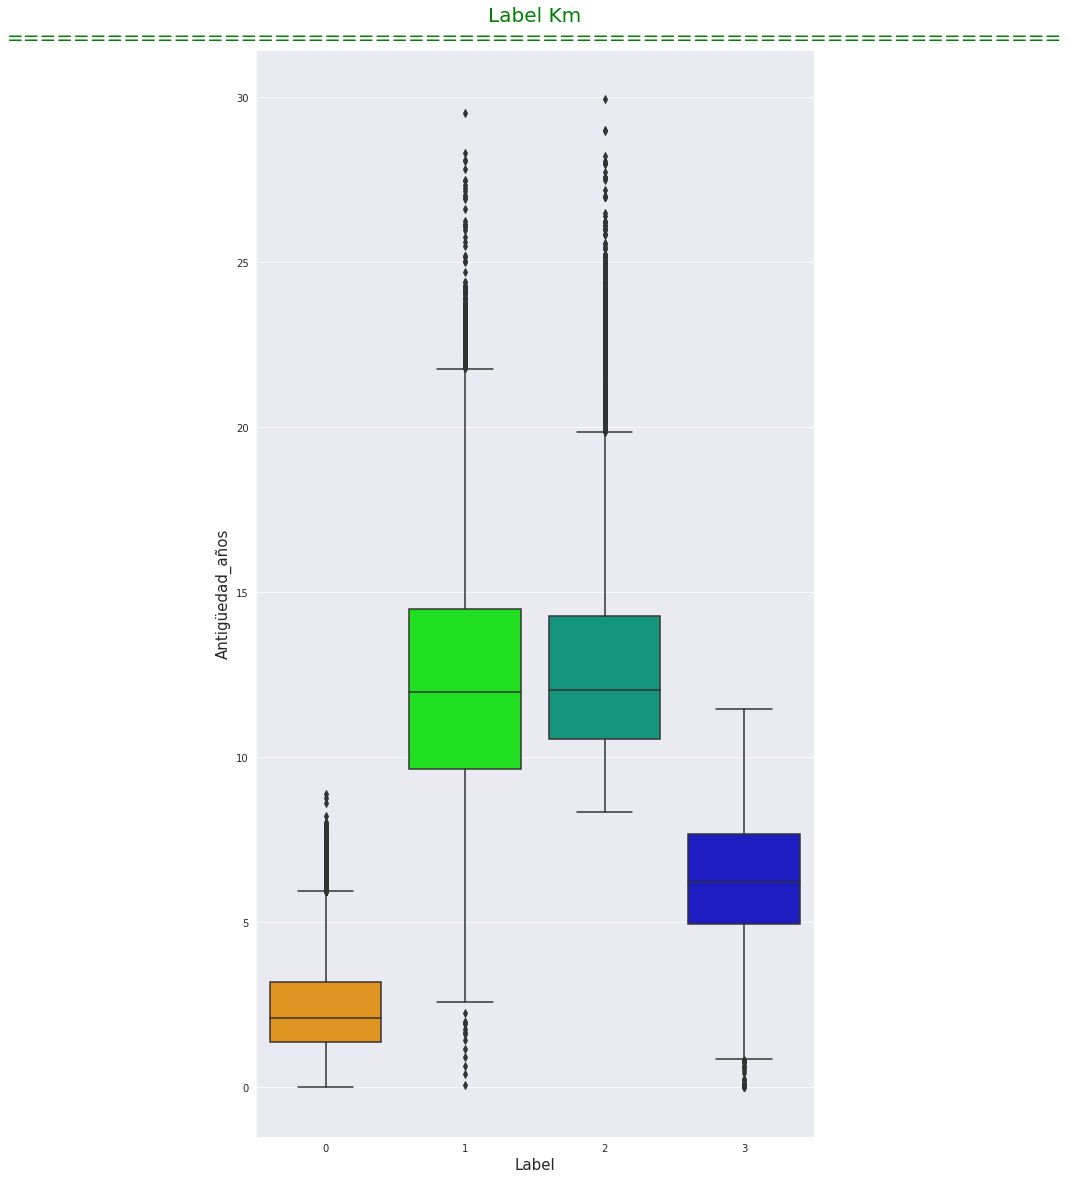

In [ ]:
# plot

# ahora lo que vemos de cada cluster son sus estadisticos. 

plt.figure(figsize=(10,20)) # tamaño del gráfico
sns.boxplot(x='Label', y='AÑOS_VEHICULO', data=df, palette="nipy_spectral_r") # las variables que voy a meter en el gráfico, además del dataframe que voy a utilizar. 
plt.title("Label Km\n===============================================================", fontsize=20, color="green")
plt.xlabel(xlabel="Label", fontsize=15)
plt.ylabel(ylabel="Antigüedad_años",fontsize=15)
plt.show()

In [ ]:
# Getting the CustomerId for each group

# vamos a crear una variable para cada cluster y los vamos a contar, además de decir cual es su id. 

cust1 = df[df.Label==0]
print("The number of customers in 1st group = ", len(cust1))

print("============================================================================================\n")

cust2 = df[df.Label==1]
print("The number of customers in 2nd group = ", len(cust2))

print("============================================================================================\n")

cust3 = df[df.Label==2]
print("The number of customers in 3rd group = ", len(cust3))

print("============================================================================================\n")

cust4 = df[df.Label==3]
print("The number of customers in 4th group = ", len(cust4))

print("============================================================================================\n")



The number of customers in 1st group =  69491

The number of customers in 2nd group =  12038

The number of customers in 3rd group =  19947

The number of customers in 4th group =  44218



In [ ]:
# el total de puntos es 
total = 69491 + 12038 + 19947 + 44218 
print(total)

145694


In [ ]:
Cust1_peso = len(cust1)/total
Cust1_peso

0.4769654206762118

In [ ]:
Cust2_peso = len(cust4)/total
Cust2_peso

0.30349911458261836

In [ ]:
print ("solmanete el cluster 0 y el 4 tienen un peso total = ", Cust1_peso + Cust2_peso)

solmanete el cluster 0 y el 4 tienen un peso total =  0.7804645352588302
